<a href="https://colab.research.google.com/github/atorr5555/proyecto-1-cripto/blob/main/Proy1Crypto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto 1 Criptografía

Equipo:

Gutiérrez Chávez Sergio Daniel

Mekibes Meza Malik

Torres Verastegui José Antonio

## Instalando bibliotecas necesarias

In [1]:
!pip install pycryptodome
!pip install XlsxWriter
!pip install matplotlib
!pip install ecdsa
!pip install cryptography

     |████████████████████████████████| 1.9 MB 8.1 MB/s 
     |████████████████████████████████| 149 kB 10.2 MB/s 
     |████████████████████████████████| 119 kB 7.9 MB/s 
     |████████████████████████████████| 3.5 MB 9.0 MB/s 


## Descargando datos utilizados

In [2]:
!wget https://raw.githubusercontent.com/atorr5555/proyecto-1-cripto/main/hash_data.txt
!wget https://raw.githubusercontent.com/atorr5555/proyecto-1-cripto/main/plain_text.txt

--2021-11-06 00:54:41--  https://raw.githubusercontent.com/atorr5555/proyecto-1-cripto/main/hash_data.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9008 (8.8K) [text/plain]
Saving to: ‘hash_data.txt’

hash_data.txt       100%[===================>]   8.80K  --.-KB/s    in 0s      

2021-11-06 00:54:41 (53.3 MB/s) - ‘hash_data.txt’ saved [9008/9008]

--2021-11-06 00:54:41--  https://raw.githubusercontent.com/atorr5555/proyecto-1-cripto/main/plain_text.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 217 [text/plain]
Saving 

In [3]:
import xlsxwriter
import time
from base64 import b64encode, b64decode
from Crypto.Cipher import ChaCha20
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad, unpad
from Crypto.Random import get_random_bytes

## Creación pruebas para *algoritmos*

### Chacha20

Key Size 256 bits

#### Encrypt

In [4]:
def Chacha_20_test(plaintext : str):
    inicio = 0
    inicio = time.perf_counter()
    key = get_random_bytes(32)
    b= bytes(plaintext, 'utf-8')
    #Creando el cifrador
    chacha_cypher = ChaCha20.new(key = key)
    #creando el objeto para cifrar
    ciphertext = chacha_cypher.encrypt(b)
    #haciendo la nonce y decodificando a utf-8
    nonce = b64encode(chacha_cypher.nonce).decode('utf-8')
    ct = b64encode(ciphertext).decode('utf-8')

    final = 0
    final = time.perf_counter()
    res1 = AES_EBC_test(key, plaintext)
    res2 = AES_CBC_test(key, plaintext)
    res = final - inicio
    return res, res1, res2

#### Decrypt

In [5]:
def Chacha_20_test_dec(key : str, plaintext : str):
    b= bytes(plaintext, 'utf-8')

    #Creando el cifrador
    chacha_cypher = ChaCha20.new(key = key)

    #creando el objeto para cifrar
    ciphertext = chacha_cypher.encrypt(b)

    #haciendo la nonce y decodificando a utf-8
    nonce = b64encode(chacha_cypher.nonce).decode('utf-8')
    ct = b64encode(ciphertext).decode('utf-8')

    inicio = 0
    inicio = time.perf_counter()

    chacha_decrypt = ChaCha20.new(key = key, nonce = b64decode(nonce))

    pt = chacha_decrypt.decrypt(b64decode(ct))
    final = 0
    final = time.perf_counter()
    res = final - inicio
    res1 = AES_EBC_test_dec(key, plaintext)
    res2 = AES_CBC_test_dec(key, plaintext)

    return res, res1, res2

### AES-EBC

Key Size 256 bits

#### Encrypt

In [6]:
def AES_EBC_test(key : str, plaintext : str):
    inicio = 0
    inicio = time.perf_counter()
    b = bytes(plaintext, 'utf-8')
    #creamos y ciframos el texto plano
    cipher = AES.new(key, AES.MODE_ECB)
    ciphertext = cipher.encrypt(pad(b, 32))
    ct = b64encode(ciphertext).decode('utf-8')

    final = 0
    final = time.perf_counter()
    res = final - inicio
    return res

#### Decrypt

In [7]:
def AES_EBC_test_dec(key : str, plaintext : str):

    b = bytes(plaintext, 'utf-8')
    #creamos y desciframos el texto cifrado
    cipher = AES.new(key, AES.MODE_ECB)
    ciphertext = cipher.encrypt(pad(b, AES.block_size))
    ct = b64encode(ciphertext).decode('utf-8')

    inicio = 0
    inicio = time.perf_counter()

    pt = unpad(cipher.decrypt(ciphertext), AES.block_size)
    final = 0
    final = time.perf_counter()
    res = final - inicio
    return res

### AES-CBC

Key Size 256 bits

#### Encrypt

In [8]:
def AES_CBC_test(key : str, plaintext : str):
    inicio = 0
    inicio = time.perf_counter()
    b = bytes(plaintext, 'utf-8')
    #creamos y ciframos el texto plano
    cipher = AES.new(key, AES.MODE_CBC)
    ciphertext = cipher.encrypt(pad(b, 32))
    ct = b64encode(ciphertext).decode('utf-8')

    final = 0
    final = time.perf_counter()
    res = final - inicio
    return res

#### Decrypt

In [9]:
def AES_CBC_test_dec(key : str, plaintext : str):

    b = bytes(plaintext, 'utf-8')
    #creamos y desciframos el texto cifrado
    cipher = AES.new(key, AES.MODE_CBC)
    ciphertext = cipher.encrypt(pad(b, AES.block_size))
    ct = b64encode(ciphertext).decode('utf-8')
    iv = b64encode(cipher.iv).decode('utf-8')
    aux = b64decode(ct)
    inicio = 0
    inicio = time.perf_counter()

    aes_decrypt= AES.new(key, AES.MODE_CBC, b64decode(iv))
    pt = unpad(aes_decrypt.decrypt(ciphertext), AES.block_size)

    final = 0
    final = time.perf_counter()
    res = final - inicio
    return res

### SHA-2

Hash size 384 bits

In [10]:
from Crypto.Hash import SHA384

def sha2_384_test(input):
  byte_stream = bytes(input, 'utf-8')
  h = SHA384.new()
  inicio = time.perf_counter()
  h.update(byte_stream)
  final = time.perf_counter()
  return (final - inicio, h.hexdigest())

### SHA-2

Hash size 512 bits

In [11]:
from Crypto.Hash import SHA512

def sha2_512_test(input):
  byte_stream = bytes(input, 'utf-8')
  h = SHA512.new()
  inicio = time.perf_counter()
  h.update(byte_stream)
  final = time.perf_counter()
  return (final - inicio, h.hexdigest())

### SHA-3

Hash size 384 bits

In [12]:
from Crypto.Hash import SHA3_384

def sha3_384_test(input):
  byte_stream = bytes(input, 'utf-8')
  h = SHA3_384.new()
  inicio = time.perf_counter()
  h.update(byte_stream)
  final = time.perf_counter()
  return (final - inicio, h.hexdigest())

### SHA-3

Hash size 512 bits

In [13]:
from Crypto.Hash import SHA3_512

def sha3_512_test(input):
  byte_stream = bytes(input, 'utf-8')
  h = SHA3_512.new()
  inicio = time.perf_counter()
  h.update(byte_stream)
  final = time.perf_counter()
  return (final - inicio, h.hexdigest())

### RSA-OAEP

1024 bits

Key Generation

In [14]:
from Crypto.PublicKey import RSA
keyPair = RSA.generate(3072)
pubKey = keyPair.publickey()
pubKeyPEM = pubKey.exportKey()
privKeyPEM = keyPair.exportKey()

In [15]:
from Crypto.Cipher import PKCS1_OAEP
import time
from base64 import b64encode

def RSA_OAEP_enc(plaintext):
    inicio = 0
    inicio = time.perf_counter()
    msg = bytes(plaintext, 'utf-8')
    encryptor = PKCS1_OAEP.new(pubKey)
    ciphertext = encryptor.encrypt(msg)
    texto_cifrado = b64encode(ciphertext).decode('utf-8')
    final = 0
    final = time.perf_counter()
    print(final - inicio)
    return (final - inicio, texto_cifrado)
    
def RSA_OAEP_dec(plaintext):
  
    msg = bytes(plaintext, 'utf-8')
    encryptor = PKCS1_OAEP.new(pubKey)
    ciphertext = encryptor.encrypt(msg)
    texto_cifrado = b64encode(ciphertext).decode('utf-8')
    inicio = time.perf_counter()
    decryptor = PKCS1_OAEP.new(keyPair)
    texto_claro = decryptor.decrypt(ciphertext)
    final = 0
    final = time.perf_counter()
    print(final - inicio)
    return (final - inicio, str(texto_claro), texto_cifrado)


### RSA-PSS

1024 bits

Key Generation

In [16]:
from Crypto.PublicKey import RSA
keyPair = RSA.generate(3072)
pubKey = keyPair.publickey()
pubKeyPEM = pubKey.exportKey()
privKeyPEM = keyPair.exportKey()

In [17]:
from Crypto.Signature import PKCS1_PSS
from Crypto.Hash import SHA256
def RSA_PSS_sign(plaintext):
    inicio = 0
    inicio = time.perf_counter()
    msg = bytes(plaintext, 'utf-8')
    h = SHA256.new(msg)
    signature = PKCS1_PSS.new(keyPair).sign(h)
    final = time.perf_counter()
    return (final - inicio, signature)

def RSA_PSS_verif(plaintext):
    msg = bytes(plaintext, 'utf-8')
    h = SHA256.new(msg)
    inicio = 0
    inicio = time.perf_counter()
    signature = PKCS1_PSS.new(keyPair).sign(h)
    verifier = PKCS1_PSS.new(pubKey)
    try:
        verifier.verify(h, signature)
        print ("The signature is authentic")
    except (ValueError, TypeError):
        print ("The signature is not authentic")
    final = time.perf_counter()
    return (final - inicio, verifier)

### ECDSA Prime Field

ECDSA, 521 Bits (Prime Field)




In [18]:
import ecdsa
import time
import pandas as pd
from base64 import b64encode

def ECDSA_PrimeField_Sign_and_verify(linea : str):
    inicio = 0
    inicio = time.perf_counter()

    byte_linea= bytes(linea,encoding='utf-8')
    sk = ecdsa.SigningKey.generate()
    vk = sk.verifying_key
    signature = sk.sign(byte_linea)

    final = 0
    final = time.perf_counter()
    res = final - inicio

    inicio1 = 0
    inicio1 = time.perf_counter()

    assert vk.verify(signature, byte_linea)

    final1 = 0
    final1 = time.perf_counter()
    res2 = final1-inicio1

    return res, res2


### ECDSA Binary Field

ECDSA, 571 Bits (Binary Field, Koblitz Curve)

In [19]:
import time
from cryptography.hazmat.primitives import hashes
from cryptography.hazmat.primitives.asymmetric import ec

def ECDSA_BinaryField_Sign_and_Verify(linea : str):
    inicio = 0
    inicio = time.perf_counter()

    byte_linea= bytes(linea,encoding='utf-16')
    private_key= ec.generate_private_key(ec.SECT571K1())

    sk = ecdsa.SigningKey.generate()
    vk = sk.verifying_key
    signature = private_key.sign(byte_linea, ec.ECDSA(hashes.SHA256()))

    final = 0
    final = time.perf_counter()
    res = final - inicio

    inicio1 = 0
    inicio1 = time.perf_counter()

    public_key = private_key.public_key()
    public_key.verify(signature, byte_linea, ec.ECDSA(hashes.SHA256()))
    final1 = 0
    final1 = time.perf_counter()
    res1 = final1 - inicio1
    return res, res1

## Resultados

### Tablas utilzando Pandas

In [20]:
import pandas as pd

Symmetric y Asymmetric

In [21]:
f = open('plain_text.txt')
vectores = []
for linea in f:
    vectores.append(linea.replace('\n', ''))
vectores

['Attack at dawn',
 'Segunda prueba jajaja',
 'Texto mas largo que la segunda prueba',
 "You're all going down",
 'La Criptografia es muy interesante',
 'Este es otro vector de prueba para cifrar',
 'Texto plano',
 'Cadena de media longitud']

Hash

In [22]:
f = open('hash_data.txt')
vectors = []
for line in f:
  vectors.append(line.replace('\n', ''))
vectors

['f714a27cd2d1bc754f5e4972ab940d366a754e029b6536655d977956a2c53880332424ddf597e6866a22bfca7aa26b7d74bc4c925014c4ed37bfe37245fa42628d1c2ee75dc909edc469ee3452d894',
 '5fe35923b4e0af7dd24971812a58425519850a506dfa9b0d254795be785786c319a2567cbaa5e35bcf8fe83d943e23fa5169b73adc1fcf8b607084b15e6a013df147e46256e4e803ab75c110f77848136be7d806e8b2f868c16c3a90c14463407038cb7d9285079ef162c6a45cedf9c9f066375c969b5fcbcda37f02aacff4f31cded3767570885426bebd9eca877e44674e9ae2f0c24cdd0e7e1aaf1ff2fe7f80a1c4f5078eb34cd4f06fa94a2d1eab5806ca43fd0f06c60b63d5402b95c70c21ea65a151c5cfaf8262a46be3c722264b',
 'ab6b92daf83275cb9c1b76cfb59fbcc8ac53188e0b6980918e7ac0c07c836ca9372d19e11251cca664bbb3c3db2e13b412a9820b65e95612042f5db24643cf9340b9808597735a1f92670ba573a2fb2f088d81087d70565574344af7576d35b2ed98318e2ca0067d4fa8e63f28045b83b6887d4ffa0668a10712ed5759',
 '035adcb639e5f28bb5c88658f45c1ce0be16e7dafe083b98d0ab45e8dcdbfa38e3234dfd973ba555b0cf8eea3c82ae1a3633fc565b7f2cc839876d3989f35731be371f60de140e3c916231ec780e5

#### Hashing

In [23]:
def genera_prueba(vector, index, length):
  list_tests = []
  for i in range(100):
    dict_round = {}
    dict_round['Vector Number'] = index
    dict_round['Test Vectors'] = vector
    dict_round['Length of vector in Bytes'] = length
    dict_round['SHA-2 384'] = sha2_384_test(vector)[0]
    dict_round['SHA-2 512'] = sha2_512_test(vector)[0]
    dict_round['SHA-3 384'] = sha3_384_test(vector)[0]
    dict_round['SHA-3 512'] = sha3_512_test(vector)[0]
    list_tests.append(dict_round)
  return list_tests

In [24]:
lista = []
i = 0
for vector in vectors:
  lista += genera_prueba(vector, i, len(vector.encode('utf-8')))
  i += 1

In [25]:
pd.set_option("display.precision", 12)
hash_data = pd.DataFrame(lista)
hash_data = hash_data.sort_values(by=['Length of vector in Bytes'])
hash_data

,Vector Number,Test Vectors,Length of vector in Bytes,SHA-2 384,SHA-2 512,SHA-3 384,SHA-3 512
0,0,f714a27cd2d1bc754f5e4972ab940d366a754e029b6536...,158,0.000134887,0.000043391,0.000037495,0.000008787
72,0,f714a27cd2d1bc754f5e4972ab940d366a754e029b6536...,158,0.000003377,0.000003857,0.000002666,0.000004480
71,0,f714a27cd2d1bc754f5e4972ab940d366a754e029b6536...,158,0.000001875,0.000001845,0.000002177,0.000004970
70,0,f714a27cd2d1bc754f5e4972ab940d366a754e029b6536...,158,0.000001900,0.000001830,0.000002220,0.000002713
69,0,f714a27cd2d1bc754f5e4972ab940d366a754e029b6536...,158,0.000001966,0.000001928,0.000002156,0.000002721
...,...,...,...,...,...,...,...
827,8,d43522210236c67e4981bf3f441b941cd52c5732b94ad7...,2042,0.000007576,0.000007490,0.000012051,0.000033871
826,8,d43522210236c67e4981bf3f441b941cd52c5732b94ad7...,2042,0.000007597,0.000007515,0.000012102,0.000021011
824,8,d43522210236c67e4981bf3f441b941cd52c5732b94ad7...,2042,0.000007613,0.000007526,0.000012089,0.000021644
835,8,d43522210236c67e4981bf3f441b941cd52c5732b94ad7...,2042,0.000007580,0.000007537,0.000012874,0.000018029


In [26]:
hash_data_mean = hash_data.groupby('Length of vector in Bytes').mean()
hash_data_mean.set_index('Vector Number')
hash_data_mean

,Vector Number,SHA-2 384,SHA-2 512,SHA-3 384,SHA-3 512
Length of vector in Bytes,,,,,
158,0,0.00000487352,0.00000361815,0.00000441537,0.00000462930
250,2,0.00000219503,0.00000210110,0.00000303765,0.00000364874
418,1,0.00000294266,0.00000321468,0.00000414429,0.00000463081
628,3,0.00000326226,0.00000325310,0.00000513832,0.00000608257
1020,6,0.00000488903,0.00000464045,0.00000691188,0.00000998357
1258,4,0.00000561377,0.00000614053,0.00000880625,0.00001201680
1468,5,0.00000657197,0.00000654071,0.00001043080,0.00001379405
1750,7,0.00000734463,0.00000737217,0.00001141372,0.00001576285
2042,8,0.00000855141,0.00000839465,0.00001344431,0.00001881266


##### Gráficas

####Hashing

In [27]:
import matplotlib.pyplot as plt

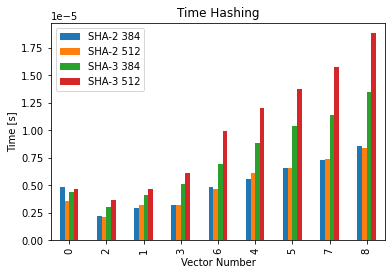

In [28]:
ax = hash_data_mean[['Vector Number', 'SHA-2 384', 'SHA-2 512', 'SHA-3 384', 'SHA-3 512']].plot(x='Vector Number',
        kind='bar',
        stacked=False,
        title='Time Hashing',
        ylabel='Time [s]')
ax

####Encryption, Decryption, Signing and Verifying 

In [29]:
def prueba_RSA(vector, index, length):
    list_tests = []
    for i in range(3):
        dict_round = {}
        dict_round['Vector Number'] = index
        dict_round['Test Vectors'] = vector
        dict_round['Length of vector in Bytes'] = length
        dict_round['RSA-OAEP Encryption Time'] = RSA_OAEP_enc(vector)[0]
        dict_round['RSA-OAEP Decryption Time'] = RSA_OAEP_dec(vector)[0]
        dict_round['ChaCha20 Encryption Time'], dict_round['AES-EBC Encryption Time'], dict_round['AES-CBC Encryption Time'] = Chacha_20_test(vector)
        dict_round['ChaCha20 Decryption Time'], dict_round['AES-EBC Decryption Time'], dict_round['AES-CBC Decryption Time'] = Chacha_20_test(vector)
        dict_round['RSA-PSS Signing Time'] = RSA_PSS_sign(vector)[0]
        dict_round['RSA-PSS Verifying Time'] = RSA_PSS_verif(vector)[0]
        list_tests.append(dict_round)
    return list_tests

In [30]:
lista = []
i = 0
for vector in vectores:
  lista += prueba_RSA(vector, i, len(vector.encode('utf-8')))
  i += 1

0.008951836999983698
0.00800409400000035
The signature is authentic
0.0024062680000156433
0.006391369999988683
The signature is authentic
0.0021465499999919757
0.0064490439999929094
The signature is authentic
0.002145471999995152
0.0062635189999866725
The signature is authentic
0.0021578639999972893
0.006113050999999814
The signature is authentic
0.0020892050000043128
0.006336872000019866
The signature is authentic
0.0021543909999763855
0.006175861000002669
The signature is authentic
0.003309172000001581
0.010165545999996084
The signature is authentic
0.003978988000000072
0.006293089000024565
The signature is authentic
0.0023076380000190966
0.0062160740000081205
The signature is authentic
0.0023823189999916394
0.006061428000009528
The signature is authentic
0.0020639180000046053
0.006317856999999094
The signature is authentic
0.0022480100000166203
0.005885506999987911
The signature is authentic
0.0028028069999948
0.006691159000013158
The signature is authentic
0.002140110999988565
0.00

In [31]:
pd.set_option("display.precision", 12)
RSA_data = pd.DataFrame(lista)
RSA_data = RSA_data.sort_values(by=['Length of vector in Bytes'])
RSA_data

,Vector Number,Test Vectors,Length of vector in Bytes,RSA-OAEP Encryption Time,RSA-OAEP Decryption Time,ChaCha20 Encryption Time,AES-EBC Encryption Time,AES-CBC Encryption Time,ChaCha20 Decryption Time,AES-EBC Decryption Time,AES-CBC Decryption Time,RSA-PSS Signing Time,RSA-PSS Verifying Time
20,6,Texto plano,11,0.002047503,0.010346239,0.000065906,0.000075835,0.000065516,0.000496719,0.000042085,0.000033128,0.006399183,0.007687964
19,6,Texto plano,11,0.002039534,0.006305953,0.000429260,0.000058107,0.000032778,0.000016933,0.000019600,0.000022374,0.006250377,0.007562754
18,6,Texto plano,11,0.002208361,0.006030543,0.000060184,0.000068222,0.000062149,0.000449185,0.000035648,0.000030829,0.006026558,0.007547044
0,0,Attack at dawn,14,0.008951837,0.008004094,0.000446862,0.000533144,0.000388429,0.000056041,0.000077263,0.000069508,0.007479601,0.007993622
1,0,Attack at dawn,14,0.002406268,0.006391370,0.000524584,0.000046899,0.000039909,0.000017292,0.000022329,0.000023017,0.006155896,0.007996147
2,0,Attack at dawn,14,0.002146550,0.006449044,0.000064323,0.000532009,0.000048878,0.000024529,0.000037657,0.000025927,0.006118913,0.008115633
10,3,You're all going down,21,0.002382319,0.006061428,0.000060210,0.000536726,0.000050482,0.000025441,0.000035720,0.000024573,0.006206294,0.007829649
9,3,You're all going down,21,0.002307638,0.006216074,0.000063987,0.000067495,0.000062033,0.000039008,0.000040237,0.000049081,0.006568162,0.007596720
11,3,You're all going down,21,0.002063918,0.006317857,0.000470728,0.000048240,0.000033769,0.000016122,0.000024104,0.000021230,0.006243173,0.007244711
5,1,Segunda prueba jajaja,21,0.002089205,0.006336872,0.000453754,0.000058209,0.000035274,0.000019891,0.000019624,0.000022872,0.005983210,0.007531549


In [32]:
RSA_data_mean = RSA_data.groupby('Length of vector in Bytes').mean()
RSA_data_mean.set_index('Vector Number')
RSA_data_mean

,Vector Number,RSA-OAEP Encryption Time,RSA-OAEP Decryption Time,ChaCha20 Encryption Time,AES-EBC Encryption Time,AES-CBC Encryption Time,ChaCha20 Decryption Time,AES-EBC Decryption Time,AES-CBC Decryption Time,RSA-PSS Signing Time,RSA-PSS Verifying Time
Length of vector in Bytes,,,,,,,,,,,
11,6,0.002098466000,0.007560911667,0.000185116667,0.000067388000,0.000053481000,0.000320945667,0.000032444333,0.000028777000,0.006225372667,0.007599254000
14,0,0.004501551667,0.006948169333,0.000345256333,0.000370684000,0.000159072000,0.000032620667,0.000045749667,0.000039484000,0.006584803333,0.008035134000
21,2,0.002191069333,0.006218133500,0.000192497167,0.000142478333,0.000117836000,0.000026719167,0.000033904333,0.000037782667,0.006143383333,0.007510234167
24,7,0.002388949333,0.006999635000,0.000365768000,0.000060522667,0.000042295667,0.000022987333,0.000024430000,0.000032915333,0.007371853667,0.008535474000
34,4,0.002396976000,0.006266530667,0.000192050667,0.000062250667,0.000178082333,0.000210167333,0.000031536333,0.000026656333,0.006260264000,0.008588397000
37,2,0.003147517000,0.007544832000,0.000224739333,0.000055127333,0.000048369667,0.000175044667,0.000031061333,0.000033301000,0.006926071667,0.008201253667
41,5,0.001918078333,0.006077389000,0.000486509333,0.000056171333,0.000039998000,0.000024012333,0.000028009000,0.000027637000,0.008372219000,0.008482194333


In [33]:
def genera_prueba_Sign(vector, index, length):
    list_tests = []
    for i in range(10):
        dict_round = {}
        dict_round['Vector Number'] = index
        dict_round['Test Vectors'] = vector
        dict_round['Length of vector in Bytes'] = length
        dict_round['Time to sign (ECDSA Prime Field)'], dict_round['Time to verify (ECDSA Prime Field)']  = ECDSA_PrimeField_Sign_and_verify(vector)
        dict_round['Time to sign (ECDSA Binary Field)'], dict_round['Time to verify (ECDSA Binary Field)'] = ECDSA_BinaryField_Sign_and_Verify(vector)
        dict_round['RSA-PSS Signing Time'] = RSA_PSS_sign(vector)[0]
        dict_round['RSA-PSS Verifying Time'] = RSA_PSS_verif(vector)[0]
        list_tests.append(dict_round)
    return list_tests

f = open('plain_text.txt')
vectors = []
for linea in f:
    vectors.append(linea.replace('\n',''))

In [34]:
lista = []
i = 0
for vector in vectors:
    lista += genera_prueba_Sign(vector, i, len(vector.encode('utf-8')))
    i += 1

The signature is authentic
The signature is authentic
The signature is authentic
The signature is authentic
The signature is authentic
The signature is authentic
The signature is authentic
The signature is authentic
The signature is authentic
The signature is authentic
The signature is authentic
The signature is authentic
The signature is authentic
The signature is authentic
The signature is authentic
The signature is authentic
The signature is authentic
The signature is authentic
The signature is authentic
The signature is authentic
The signature is authentic
The signature is authentic
The signature is authentic
The signature is authentic
The signature is authentic
The signature is authentic
The signature is authentic
The signature is authentic
The signature is authentic
The signature is authentic
The signature is authentic
The signature is authentic
The signature is authentic
The signature is authentic
The signature is authentic
The signature is authentic
The signature is authentic
T

In [35]:
pd.set_option("display.precision", 12)
sign_data = pd.DataFrame(lista)
sign_data = sign_data.sort_values(by=['Length of vector in Bytes'])
sign_data

,Vector Number,Test Vectors,Length of vector in Bytes,Time to sign (ECDSA Prime Field),Time to verify (ECDSA Prime Field),Time to sign (ECDSA Binary Field),Time to verify (ECDSA Binary Field),RSA-PSS Signing Time,RSA-PSS Verifying Time
65,6,Texto plano,11,0.001681947,0.002360894,0.005541966,0.004903521,0.006689150,0.009056887
60,6,Texto plano,11,0.001167990,0.001917959,0.007344891,0.004482164,0.006168237,0.008219130
61,6,Texto plano,11,0.001181425,0.002182008,0.005074679,0.004436647,0.006693128,0.008690139
62,6,Texto plano,11,0.001232624,0.002074498,0.004717656,0.004402398,0.006209868,0.007919510
63,6,Texto plano,11,0.001143229,0.002054178,0.005081014,0.004289103,0.006304455,0.008694716
...,...,...,...,...,...,...,...,...,...
55,5,Este es otro vector de prueba para cifrar,41,0.001208435,0.002023722,0.005000156,0.004920158,0.006312613,0.007983583
56,5,Este es otro vector de prueba para cifrar,41,0.001195678,0.002110986,0.005148106,0.004435787,0.006290352,0.008211261
57,5,Este es otro vector de prueba para cifrar,41,0.001272847,0.002146480,0.005463780,0.004655250,0.006519229,0.008321629
59,5,Este es otro vector de prueba para cifrar,41,0.001203232,0.002192863,0.005346748,0.004424884,0.006204207,0.007850904


In [36]:
sign_data_mean = sign_data.groupby('Length of vector in Bytes').mean()
sign_data_mean.set_index('Vector Number')
sign_data_mean

,Vector Number,Time to sign (ECDSA Prime Field),Time to verify (ECDSA Prime Field),Time to sign (ECDSA Binary Field),Time to verify (ECDSA Binary Field),RSA-PSS Signing Time,RSA-PSS Verifying Time
Length of vector in Bytes,,,,,,,
11,6,0.0013802217,0.00217189740,0.00581220270,0.00471460870,0.0075725979,0.0095748672
14,0,0.0026085372,0.00212277090,0.00965458130,0.00462811390,0.0063890306,0.0084891737
21,2,0.0013196861,0.00223259635,0.00599413715,0.00530238435,0.0067305785,0.0086227088
24,7,0.0014242655,0.00229600460,0.00590634040,0.00455206120,0.0062783850,0.0081777894
34,4,0.0014387809,0.00223147390,0.00629697040,0.00495193120,0.0068152542,0.0081796689
37,2,0.0012462813,0.00220243050,0.00586004440,0.00472257780,0.0067081406,0.0083158474
41,5,0.0012487586,0.00235979350,0.00575446950,0.00463049420,0.0063422909,0.0080923715


##### Gráficas

In [37]:
import matplotlib.pyplot as plt

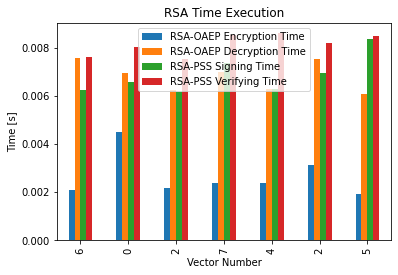

In [38]:
ax = RSA_data_mean[['Vector Number', 'RSA-OAEP Encryption Time', 'RSA-OAEP Decryption Time','RSA-PSS Signing Time', 
                     'RSA-PSS Verifying Time']].plot(x='Vector Number', kind='bar', stacked=False, title='RSA Time Execution', ylabel='Time [s]')
ax

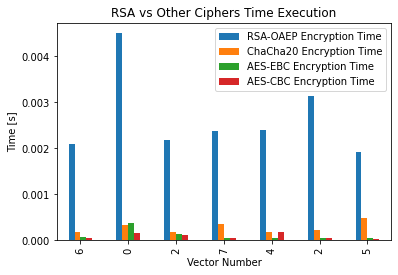

In [39]:
ax = RSA_data_mean[['Vector Number', 'RSA-OAEP Encryption Time', 'ChaCha20 Encryption Time', 
                    'AES-EBC Encryption Time', 'AES-CBC Encryption Time']].plot(x='Vector Number', kind='bar', stacked=False, title='RSA vs Other Ciphers Time Execution', ylabel='Time [s]')
ax

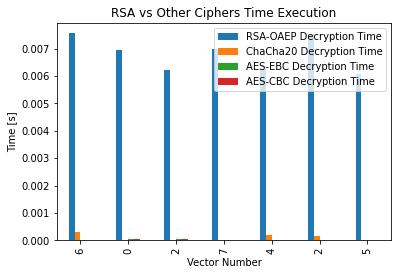

In [40]:
ax = RSA_data_mean[['Vector Number', 'RSA-OAEP Decryption Time', 'ChaCha20 Decryption Time', 
                    'AES-EBC Decryption Time', 'AES-CBC Decryption Time']].plot(x='Vector Number', kind='bar', stacked=False, title='RSA vs Other Ciphers Time Execution', ylabel='Time [s]')
ax

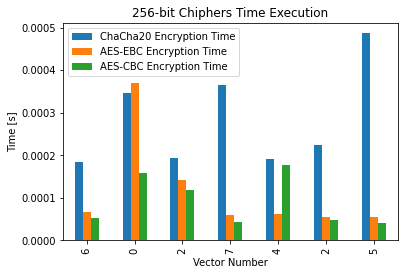

In [41]:
ax = RSA_data_mean[['Vector Number','ChaCha20 Encryption Time', 'AES-EBC Encryption Time', 
                    'AES-CBC Encryption Time']].plot(x='Vector Number', kind='bar', stacked=False, title='256-bit Chiphers Time Execution', ylabel='Time [s]')
ax

In [42]:
import matplotlib.pyplot as plt

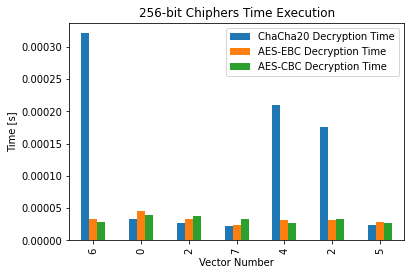

In [43]:
ax = RSA_data_mean[['Vector Number','ChaCha20 Decryption Time', 'AES-EBC Decryption Time', 
                    'AES-CBC Decryption Time']].plot(x='Vector Number', kind='bar', stacked=False, title='256-bit Chiphers Time Execution', ylabel='Time [s]')
ax

In [44]:
import matplotlib.pyplot as plt

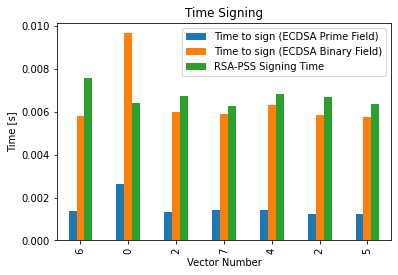

In [45]:
ax = sign_data_mean[['Vector Number', 'Time to sign (ECDSA Prime Field)', 'Time to sign (ECDSA Binary Field)', 'RSA-PSS Signing Time' ]].plot(x='Vector Number',
        kind='bar',
        stacked=False,
        title='Time Signing',
        ylabel='Time [s]')
ax

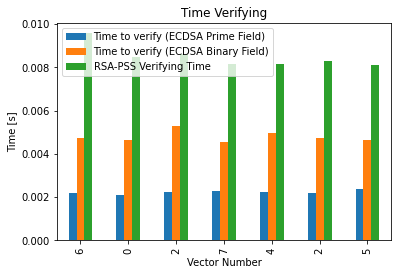

In [46]:
ax = sign_data_mean[['Vector Number', 'Time to verify (ECDSA Prime Field)', 'Time to verify (ECDSA Binary Field)', 'RSA-PSS Verifying Time']].plot(x='Vector Number',
        kind='bar',
        stacked=False,
        title='Time Verifying',
        ylabel='Time [s]')
ax